# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout
import warnings
warnings.filterwarnings('ignore')

### Reading Dataset

In [2]:
df=pd.read_csv('TASK-ML-INTERN.csv')

In [3]:
df

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


### Extracting Features And Target Value

In [4]:
df_features = df.iloc[:, 1:-1]
df_y=df.iloc[:,-1]

In [5]:
df_features #Features Of 448 columns

,0,1,2,3,4,5,6,7,8,9,...,438,439,440,441,442,443,444,445,446,447
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.680883,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.701600,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.671400,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176
3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.728588,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.779194,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,0.402912,...,0.741594,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839
496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,0.327545,...,0.642285,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733
497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,0.437731,...,0.784919,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187
498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,0.427200,...,0.748725,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383


In [6]:
df_y

0      1100.0
1      1000.0
2      1300.0
3      1300.0
4       220.0
        ...  
495    1200.0
496       0.0
497       0.0
498       0.0
499    1400.0
Name: vomitoxin_ppb, Length: 500, dtype: float64

# Trying to plot one image

In [7]:
img=df_features.to_numpy()[0].reshape(16,28)

In [8]:
img.shape

(16, 28)

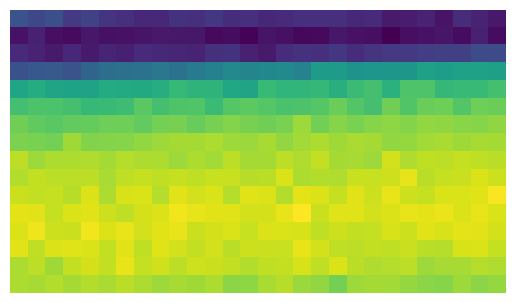

In [10]:
plt.imshow(img)
plt.axis('off')
plt.show()

# Checking For Null Values

In [11]:
df_features.isna().sum().sum()

0

### Data Visualization

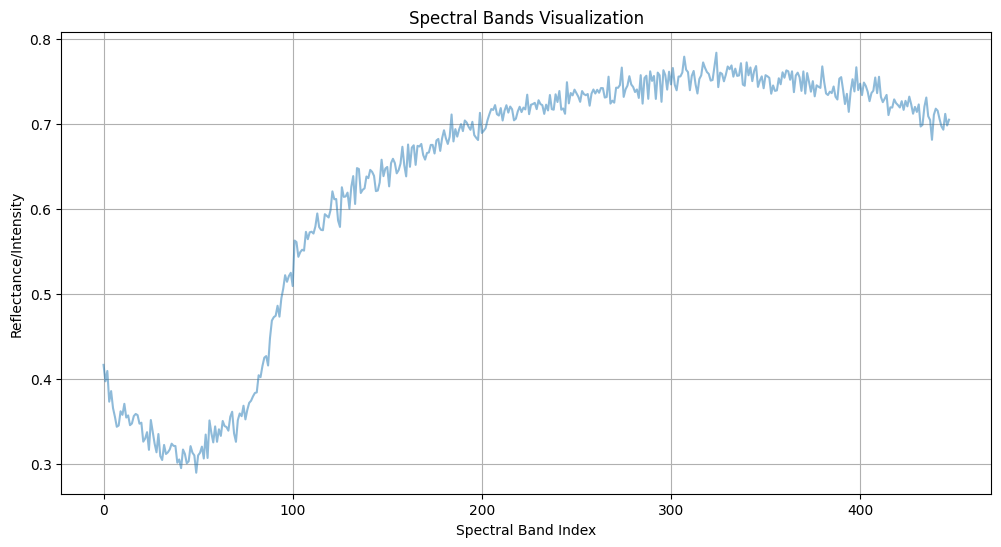

In [12]:
spectral_data = df_features[:1].to_numpy()
plt.figure(figsize=(12, 6))
for i in range(spectral_data.shape[0]): 
    plt.plot(spectral_data[i], alpha=0.5)

plt.xlabel("Spectral Band Index")
plt.ylabel("Reflectance/Intensity")
plt.title("Spectral Bands Visualization")
plt.grid(True)
plt.show()


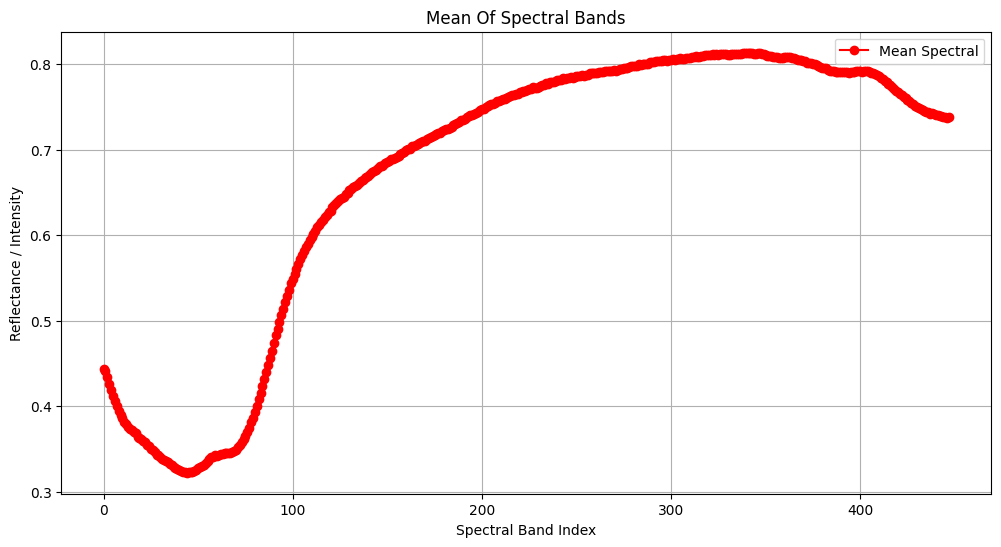

In [13]:
# Mean Spectral Bands

spectral_data = df_features.to_numpy()
avg_reflectance = np.mean(spectral_data, axis=0)
plt.figure(figsize=(12, 6))
plt.plot(avg_reflectance, marker="o", color="r", label="Mean Spectral")
plt.xlabel("Spectral Band Index")
plt.ylabel("Reflectance / Intensity")
plt.title("Mean Of Spectral Bands")
plt.legend()
plt.grid(True)
plt.show()

<Axes: >

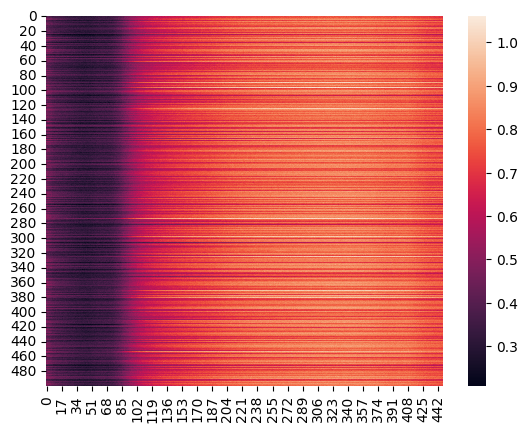

In [14]:
# Heatmap

sns.heatmap(spectral_data)

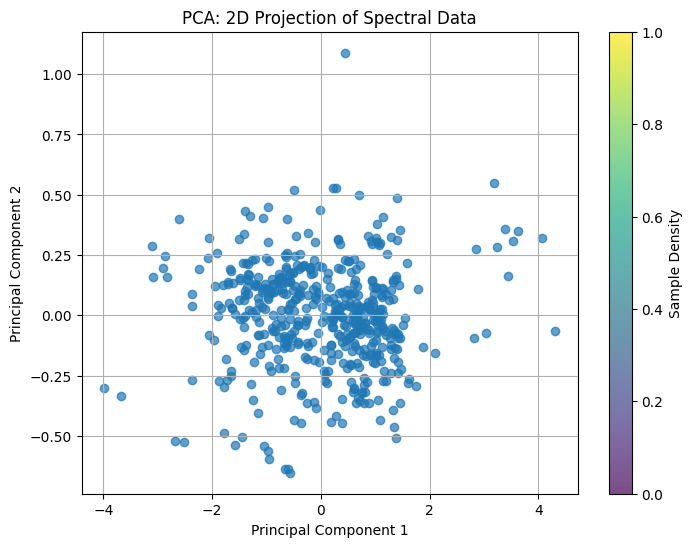

In [15]:
# Taking PCA in 2D

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_features)
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7, cmap="viridis")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: 2D Projection of Spectral Data")
plt.colorbar(label="Sample Density")
plt.grid()
plt.show()


In [16]:
pca.explained_variance_

array([1.35413298, 0.04602629])

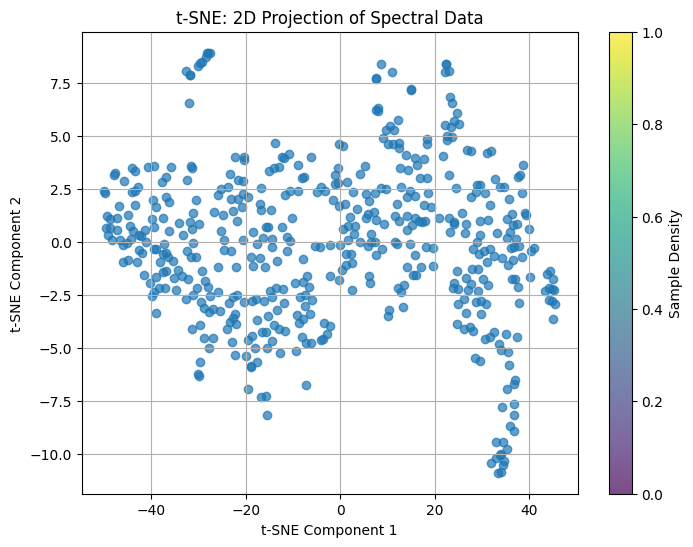

In [17]:
# Tsne Visualization

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(df_features)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.7, cmap="coolwarm")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE: 2D Projection of Spectral Data")
plt.colorbar(label="Sample Density")
plt.grid()
plt.show()

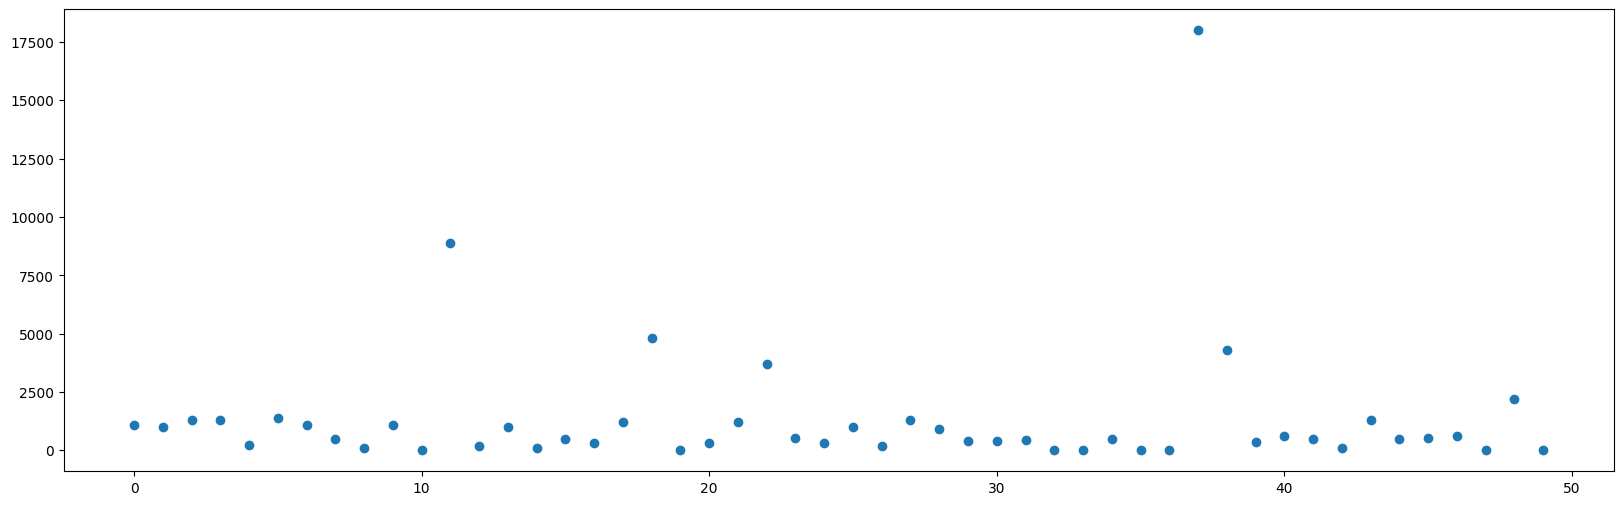

In [18]:
# Plotting first 50 values of y

plt.figure(figsize=(20, 6))
plt.scatter(np.arange(50),df_y[:50])
plt.show()

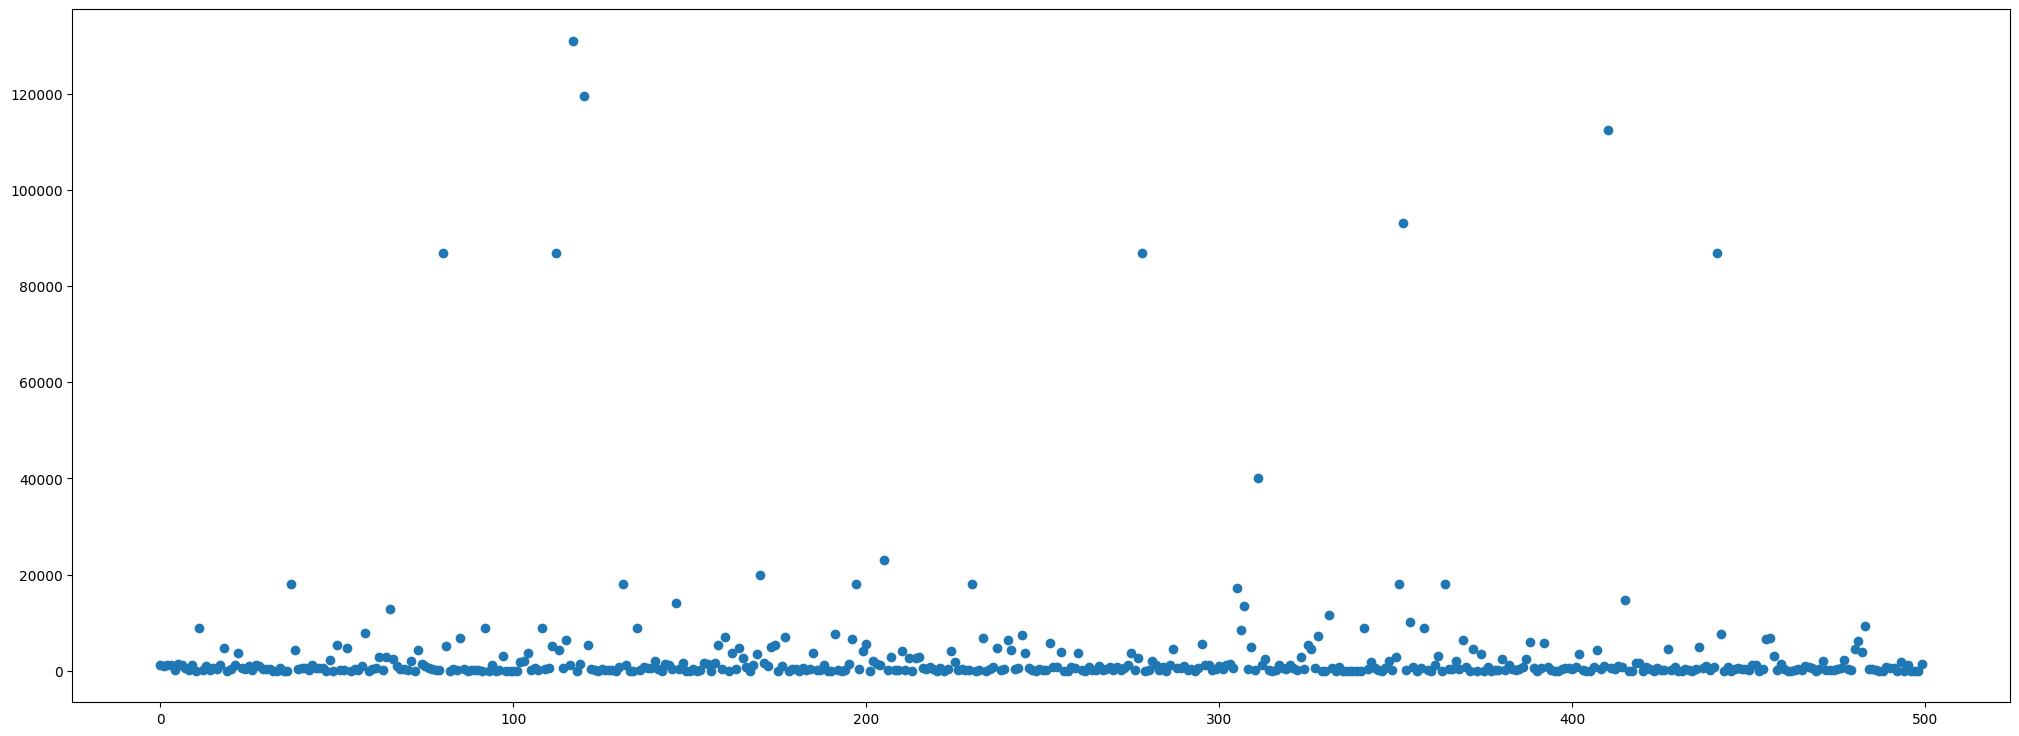

In [19]:
# plotting Y
plt.figure(figsize=(25, 9))
plt.scatter(np.arange(500),df_y)
plt.show()

### Data Preprocessing

In [20]:
# Conversion to numpy
X = df_features.values 
y = df_y.values

# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization of dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the shape of data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 448), (100, 448), (400,), (100,))

### Model Creation

In [21]:
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# CNN Model
cnn_model = Sequential([
    Conv1D(64, kernel_size=3, activation="relu", input_shape=(X_train_cnn.shape[1], 1)),
    Conv1D(32, kernel_size=3, activation="relu"),
    Flatten(),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="linear")
])

cnn_model.compile(optimizer="adam", loss="mse")

cnn_model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), 
              epochs=100, batch_size=32)

# Store Predicted Y test Values
y_pred_cnn = cnn_model.predict(X_test_cnn).flatten()
print("CNN MAE:", mean_absolute_error(y_test, y_pred_cnn))


Epoch 1/100
13/13 [==============================] - 7s 112ms/step - loss: 153445648.0000 - val_loss: 297666144.0000
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 151962016.0000 - val_loss: 292765792.0000
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 148071376.0000 - val_loss: 283463680.0000
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 145205808.0000 - val_loss: 277042848.0000
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 145061584.0000 - val_loss: 270080480.0000
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 141553792.0000 - val_loss: 268196592.0000
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 140652016.0000 - val_loss: 267724144.0000
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 140788816.0000 - val_loss: 263018192.0000
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 14044

# Testing Model And Predicting Outputs

13/13 [==============================] - 0s 2ms/step


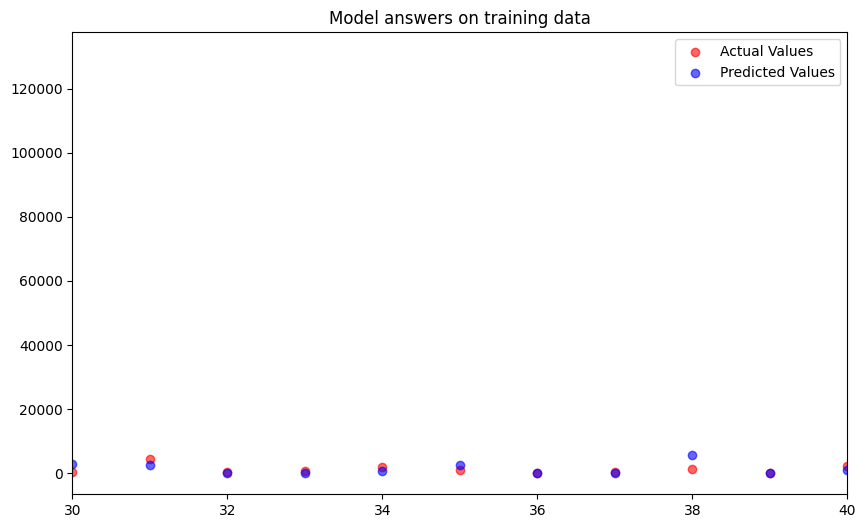

In [22]:
# Testing Model on training set
train_y_pred_cnn = cnn_model.predict(X_train_cnn).flatten()
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_train)), y_train, label="Actual Values", color="red", alpha=0.6)
plt.scatter(range(len(train_y_pred_cnn)), train_y_pred_cnn, label="Predicted Values", color="blue", alpha=0.6)
plt.title("Model answers on training data")
plt.xlim(30,40)
plt.legend()
plt.show()

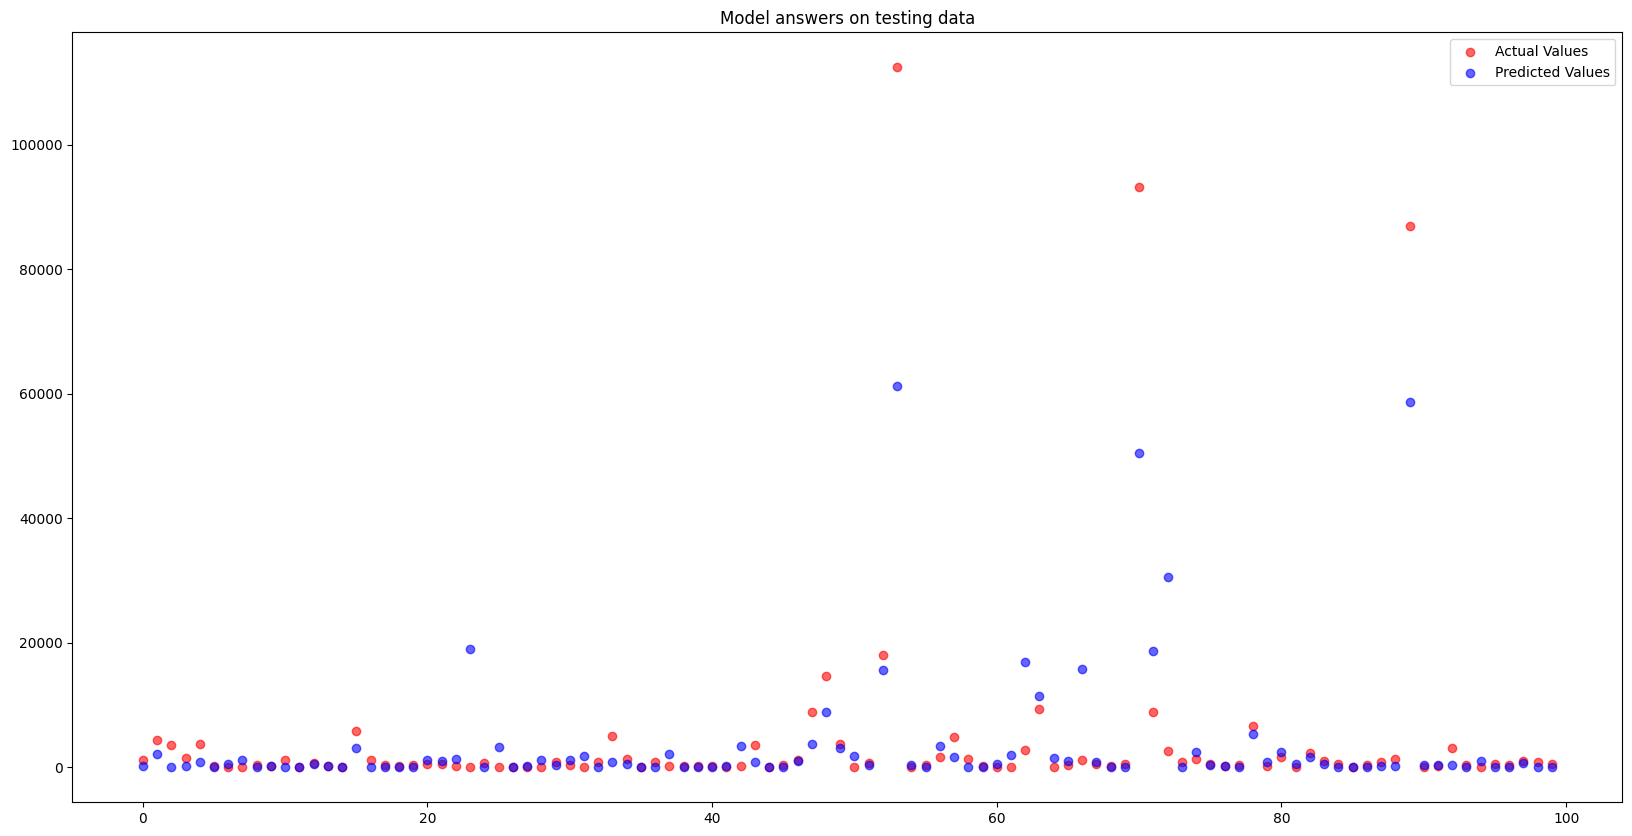

In [23]:
# testing model on test set
plt.figure(figsize=(20,10))
plt.scatter(range(len(y_test)), y_test, label="Actual Values", color="red", alpha=0.6)
plt.scatter(range(len(y_pred_cnn)), y_pred_cnn, label="Predicted Values", color="blue", alpha=0.6)
plt.title("Model answers on testing data")
plt.legend()
plt.show()

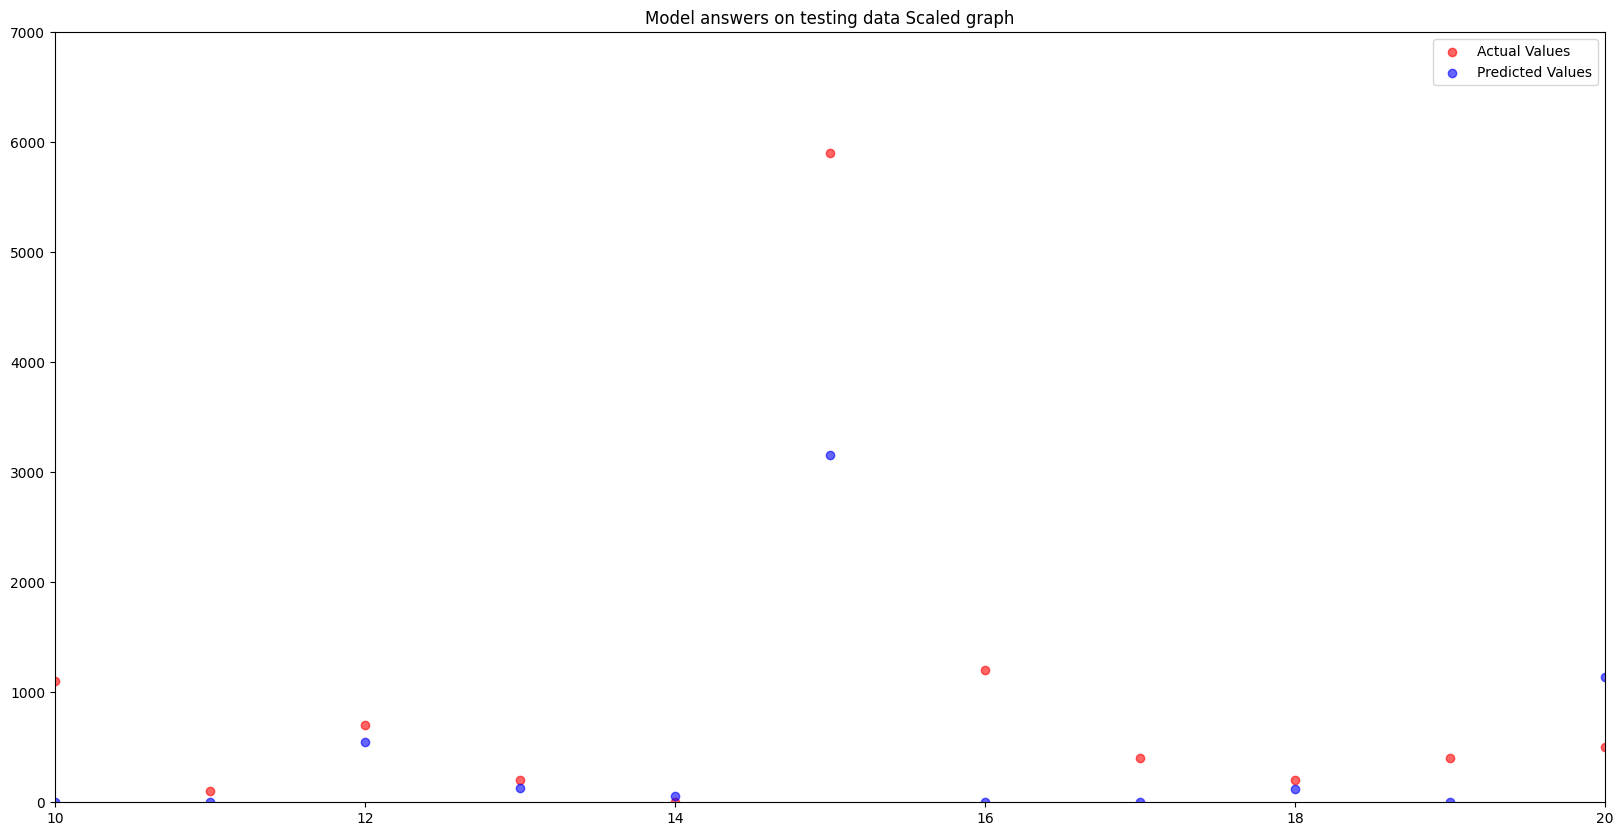

In [24]:
# Scaling the predicted graph
plt.figure(figsize=(20,10))
plt.scatter(range(len(y_test)), y_test, label="Actual Values", color="red", alpha=0.6)
plt.scatter(range(len(y_pred_cnn)), y_pred_cnn, label="Predicted Values", color="blue", alpha=0.6)
plt.legend()
plt.title("Model answers on testing data Scaled graph")
plt.xlim(10,20)
plt.ylim(0,7000)
plt.show()